# PROBLEM STATEMENT

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

## Data Dictionary 

| Variable | Description |
|----------|-------------|
|enrollee_id| Unique ID for enrollee|
|city|City code|
|city_development_index|Developement index of the city (scaled)|
|gender|Gender|
|relevent_experience|Relevent experience|
|enrolled_university|Type of University course enrolled if any|
|education_level|Education level|
|major_discipline|Major discipline|
|experience|Total experience in years|
|company_size|No of employees in current employer's company|
|company_type|Type of current employer|
|last_new_job|Difference in years between previous job and current job|
|training_hours|training hours completed|

target

0 – Not looking for job change, 1 – Looking for a job change

 

Note that the dataset has a number of missing values and must be treated accordingly before fitting any model. You can refer to this article for a primer on how to deal with missing values.

sample_submission.csv <br>

|Column Name|	Description|
|-----------|------------|
|enrollee_id|Unique ID for enrollee|
|target|probability of an enrollee looking for a job change|

In [0]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=9d8c06e9eedbbdba3d9d342443116f80cfe5043658b5e56deefd74155ba49a81
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [0]:
import pyforest

In [0]:
PATH = '/content/drive/My Drive/Janatahack_HR_ANALYTICS/'

train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
CATEGORICAL_COL = ['city','gender','enrolled_university',\
                   'major_discipline', 'company_type','relevent_experience']

ORDINAL = ['education_level', 'experience','company_size','last_new_job']

# DATA description

In [0]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [0]:
print('Number of records in train set', train.shape[0])
print('Number of records in test set', test.shape[0])

Number of records in train set 18359
Number of records in test set 15021


In [0]:
train['target'].value_counts(normalize=True)

0    0.867912
1    0.132088
Name: target, dtype: float64

It is highly Imbalanced dataset
with 86% class as not looking for change and 14% looking for change

In [0]:
def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data)

In [0]:
miss_data(train)

<IPython.core.display.Javascript object>

               column_name missing_data  missing_in_percentage
0              enrollee_id            0               0.000000
1                     city            0               0.000000
2   city_development_index            0               0.000000
3                   gender         4098              22.321477
4      relevent_experience            0               0.000000
5      enrolled_university          342               1.862847
6          education_level          457               2.489242
7         major_discipline         2838              15.458358
8               experience           59               0.321368
9             company_size         4779              26.030830
10            company_type         5039              27.447029
11            last_new_job          367               1.999020
12          training_hours            0               0.000000
13                  target            0               0.000000


From the above table we can see that three columns gender, company_size and company_type has 27% missing values highest among the othre columns

In [0]:
miss_data(test)

<IPython.core.display.Javascript object>

               column_name missing_data  missing_in_percentage
0              enrollee_id            0               0.000000
1                     city            0               0.000000
2   city_development_index            0               0.000000
3                   gender         3388              22.555090
4      relevent_experience            0               0.000000
5      enrolled_university          279               1.857400
6          education_level          395               2.629652
7         major_discipline         2393              15.931030
8               experience           44               0.292923
9             company_size         4051              26.968910
10            company_type         4330              28.826310
11            last_new_job          304               2.023833
12          training_hours            0               0.000000


Test set follows the similar distribution for missing data as training set

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

we have two continuous attributes city development index and training hours rest all are categorical columns

In [0]:
print('Number of unique elements in each column')
print('******************************************')
for i in train.columns:
  uniq = train[i].nunique()
  print(f'{i}: {uniq}')

Number of unique elements in each column
******************************************
enrollee_id: 18359
city: 123
city_development_index: 93
gender: 3
relevent_experience: 2
enrolled_university: 3
education_level: 5
major_discipline: 6
experience: 22
company_size: 8
company_type: 6
last_new_job: 6
training_hours: 241
target: 2


In [0]:
CATEGORICAL_COL = ['city','gender', 'relevent_experience','enrolled_university',\
                   'education_level','major_discipline','experience',\
                   'company_size','company_type','last_new_job']

In [0]:
for i in CATEGORICAL_COL:
  print(f'{i}:{test[i].unique()}')

city:['city_33' 'city_28' 'city_103' 'city_104' 'city_77' 'city_160' 'city_21'
 'city_114' 'city_16' 'city_67' 'city_50' 'city_71' 'city_136' 'city_59'
 'city_102' 'city_57' 'city_100' 'city_173' 'city_65' 'city_36' 'city_97'
 'city_1' 'city_24' 'city_61' 'city_117' 'city_101' 'city_13' 'city_10'
 'city_75' 'city_180' 'city_140' 'city_131' 'city_138' 'city_45' 'city_74'
 'city_142' 'city_46' 'city_73' 'city_141' 'city_157' 'city_11' 'city_116'
 'city_109' 'city_89' 'city_80' 'city_39' 'city_98' 'city_41' 'city_152'
 'city_99' 'city_42' 'city_143' 'city_105' 'city_83' 'city_91' 'city_149'
 'city_134' 'city_93' 'city_20' 'city_165' 'city_23' 'city_146' 'city_128'
 'city_19' 'city_84' 'city_76' 'city_94' 'city_127' 'city_162' 'city_90'
 'city_30' 'city_53' 'city_40' 'city_120' 'city_62' 'city_123' 'city_82'
 'city_158' 'city_167' 'city_54' 'city_118' 'city_64' 'city_121'
 'city_176' 'city_70' 'city_150' 'city_159' 'city_27' 'city_133'
 'city_115' 'city_18' 'city_171' 'city_145' 'city_44' 

In [0]:
for i in CATEGORICAL_COL:
  print(f'{i}:{train[i].unique()}')

city:['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'city_78' 'city_80' 'city_33' 'city_7' 'ci

# EDA

In [0]:
def col_plot(train, col):
  fig, ax = plt.subplots(1, 2, figsize=(14, 4))
  train[train['target'] == 0][col].value_counts(normalize=True).plot(kind='bar',ax=ax[0]).set_title('STAY')
  train[train['target'] == 1][col].value_counts(normalize=True).plot(kind='bar',ax=ax[1]).set_title('LEAVE')
  plt.show()

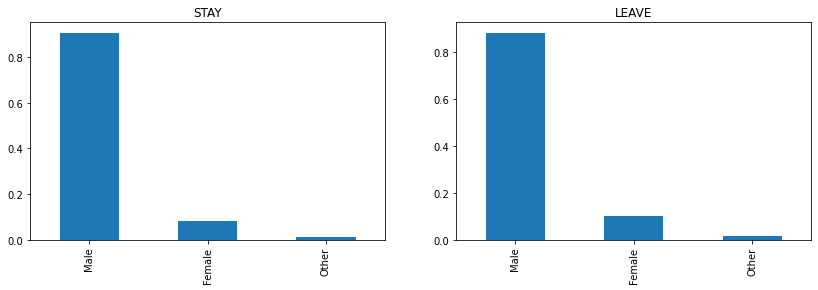

In [0]:
col_plot(train, 'gender')

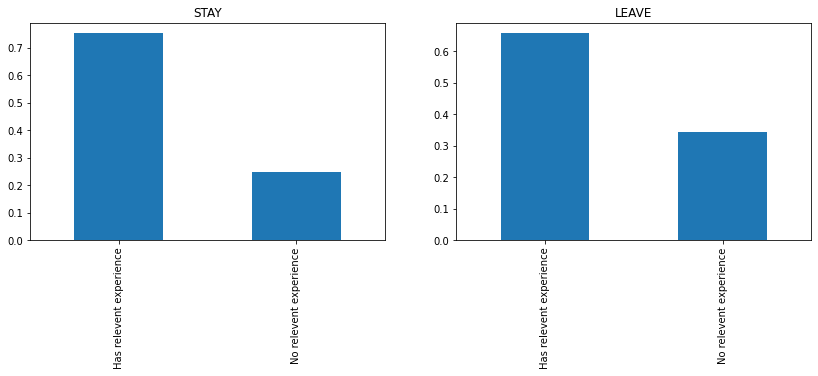

In [0]:
col_plot(train,'relevent_experience')

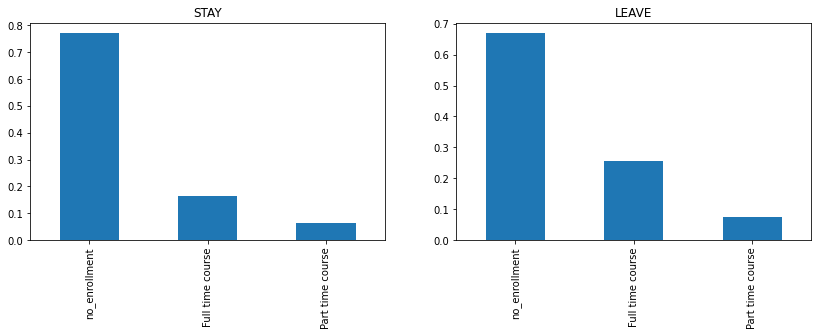

In [0]:
col_plot(train,'enrolled_university')

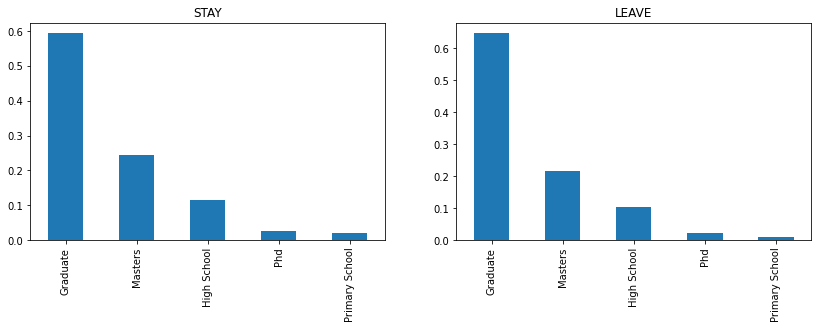

In [0]:
col_plot(train,'education_level')

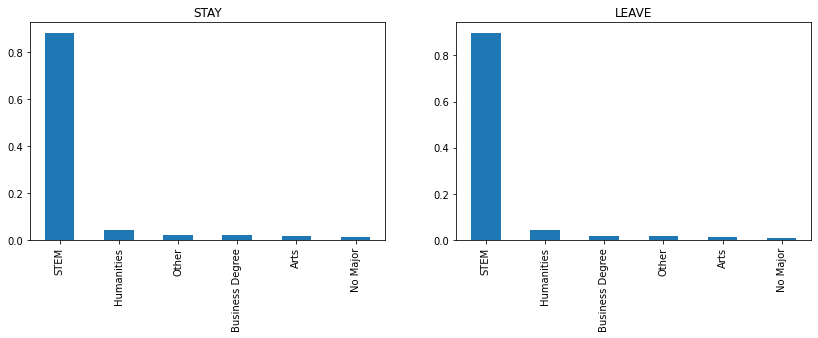

In [0]:
col_plot(train, 'major_discipline')

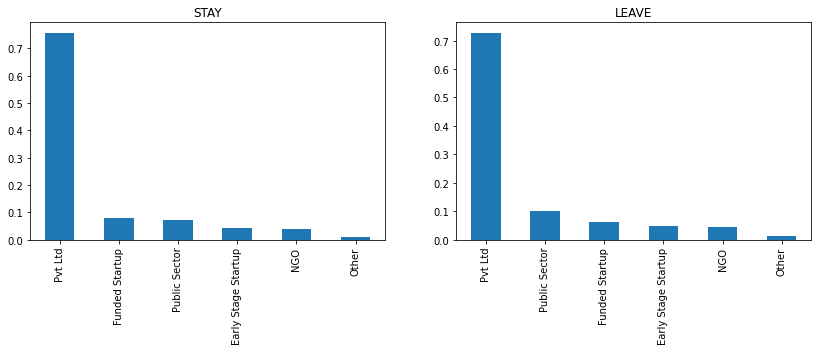

In [0]:
col_plot(train,'company_type')

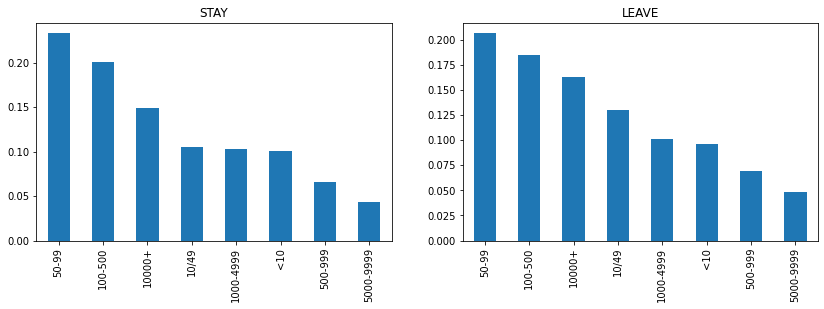

In [0]:
col_plot(train,'company_size')

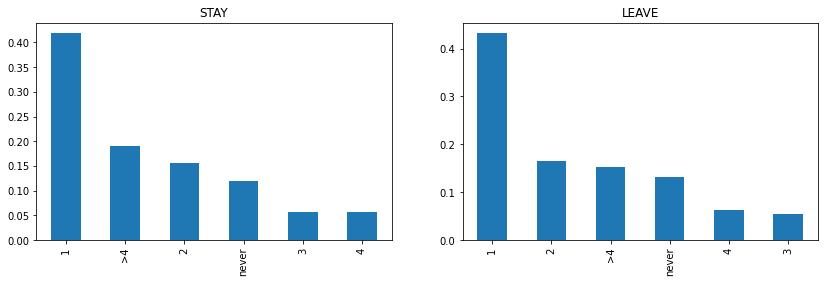

In [0]:
col_plot(train,'last_new_job')

From the charts, distribution is pretty much is similar between the two class

# ENCODING THE CATEGORICAL VARIABLE

In [0]:

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]


        return self.label_encoder.transform(new_data_list)

In [0]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoderExt()

In [0]:
for i in CATEGORICAL_COL:
  # saving the index of null value in column
  org = train[i]
  idx = org.isna()
  # creating the encoded value
  label_encoder.fit(train[i].astype(str))
  print(i)
  print('encoding classes', label_encoder.classes_)
  # transforming the train set value
  train[i] = label_encoder.transform(train[i].astype(str))
  # replacing the null values using the idx
  train[i] = train[i].where(~idx, org)
  org2 = test[i]
  idx2 = org2.isna()
  # transforming the test set value
  test[i] = label_encoder.transform(test[i].astype(str))
  # replacing the null values using the idx
  test[i] = test[i].where(~idx2, org2)

city
encoding classes ['Unknown' 'city_1' 'city_10' 'city_100' 'city_101' 'city_102' 'city_103'
 'city_104' 'city_105' 'city_106' 'city_107' 'city_109' 'city_11'
 'city_111' 'city_114' 'city_115' 'city_116' 'city_117' 'city_118'
 'city_12' 'city_120' 'city_121' 'city_123' 'city_126' 'city_127'
 'city_128' 'city_129' 'city_13' 'city_131' 'city_133' 'city_134'
 'city_136' 'city_138' 'city_139' 'city_14' 'city_140' 'city_141'
 'city_142' 'city_143' 'city_144' 'city_145' 'city_146' 'city_149'
 'city_150' 'city_152' 'city_155' 'city_157' 'city_158' 'city_159'
 'city_16' 'city_160' 'city_162' 'city_165' 'city_166' 'city_167'
 'city_171' 'city_173' 'city_175' 'city_176' 'city_179' 'city_18'
 'city_180' 'city_19' 'city_2' 'city_20' 'city_21' 'city_23' 'city_24'
 'city_25' 'city_26' 'city_27' 'city_28' 'city_30' 'city_31' 'city_33'
 'city_36' 'city_37' 'city_39' 'city_40' 'city_41' 'city_42' 'city_43'
 'city_44' 'city_45' 'city_46' 'city_48' 'city_50' 'city_53' 'city_54'
 'city_55' 'city_57' 'c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

gender
encoding classes ['Female' 'Male' 'Other' 'Unknown' 'nan']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

enrolled_university
encoding classes ['Full time course' 'Part time course' 'Unknown' 'nan' 'no_enrollment']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

major_discipline
encoding classes ['Arts' 'Business Degree' 'Humanities' 'No Major' 'Other' 'STEM' 'Unknown'
 'nan']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

company_type
encoding classes ['Early Stage Startup' 'Funded Startup' 'NGO' 'Other' 'Public Sector'
 'Pvt Ltd' 'Unknown' 'nan']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

relevent_experience
encoding classes ['Has relevent experience' 'No relevent experience' 'Unknown']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,42,0.689,1,0,4,Graduate,5,3,100-500,5,1,106,0
1,29166,113,0.923,1,0,4,Graduate,5,14,<10,1,1,69,0
2,46,49,0.910,NaN,0,4,Graduate,5,6,50-99,4,2,4,0
3,18527,94,0.666,1,0,4,Graduate,5,14,50-99,5,1,26,0
4,21751,3,0.887,NaN,1,4,Masters,5,8,NaN,NaN,2,88,1


In [0]:
comp_siz_mean = {'<10': 5, '10/49':30, '50-99':75, '100-500':300, \
            '500-999':750, '1000-4999':3000, '5000-9999':7500, '10000+':10000}

In [0]:
edu_level = {'Primary School':0,'High School':1,
             'Graduate':2, 'Masters':3, 'Phd':4}
exp = {'>20': '21', '<1':'0'}
comp_siz = {'<10': 0, '10/49':1, '50-99':2, '100-500':3, \
            '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
last_new = {'>4':'5', 'never':'0'}

In [0]:
train['comp_size_mean'] = train['company_size'].replace(comp_siz_mean)
test['comp_size_mean'] = test['company_size'].replace(comp_siz_mean)

In [0]:
train['education_level'].replace(edu_level, inplace=True)
train['experience'].replace(exp, inplace=True)
train['company_size'].replace(comp_siz, inplace=True)
train['last_new_job'].replace(last_new, inplace=True)

In [0]:
test['education_level'].replace(edu_level, inplace=True)
test['experience'].replace(exp, inplace=True)
test['company_size'].replace(comp_siz, inplace=True)
test['last_new_job'].replace(last_new, inplace=True)

# IMPUTING THE MISSING VALUES

In [0]:
 from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

In [0]:
col = ['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours',
       'comp_size_mean']

In [0]:
new_train = pd.DataFrame(imputer.fit_transform(train.drop(['target'], axis=1)), columns=col)
new_train[CATEGORICAL_COL] = round(new_train[CATEGORICAL_COL])
new_train[ORDINAL] = round(new_train[ORDINAL])

<IPython.core.display.Javascript object>

In [0]:
new_train['target'] = train['target']

In [0]:
new_test = pd.DataFrame(imputer.transform(test), columns=test.columns)
new_test[CATEGORICAL_COL] = round(new_test[CATEGORICAL_COL])
new_test[ORDINAL] = round(new_test[ORDINAL])

<IPython.core.display.Javascript object>

# CATEGORICAL CORRELATION

Using crammer's V

In [0]:
!pip install dython

In [0]:
from dython.model_utils import roc_graph
from dython.nominal import associations


In [0]:
cat_df = train[CATEGORICAL_COL + ['target']].astype(str)

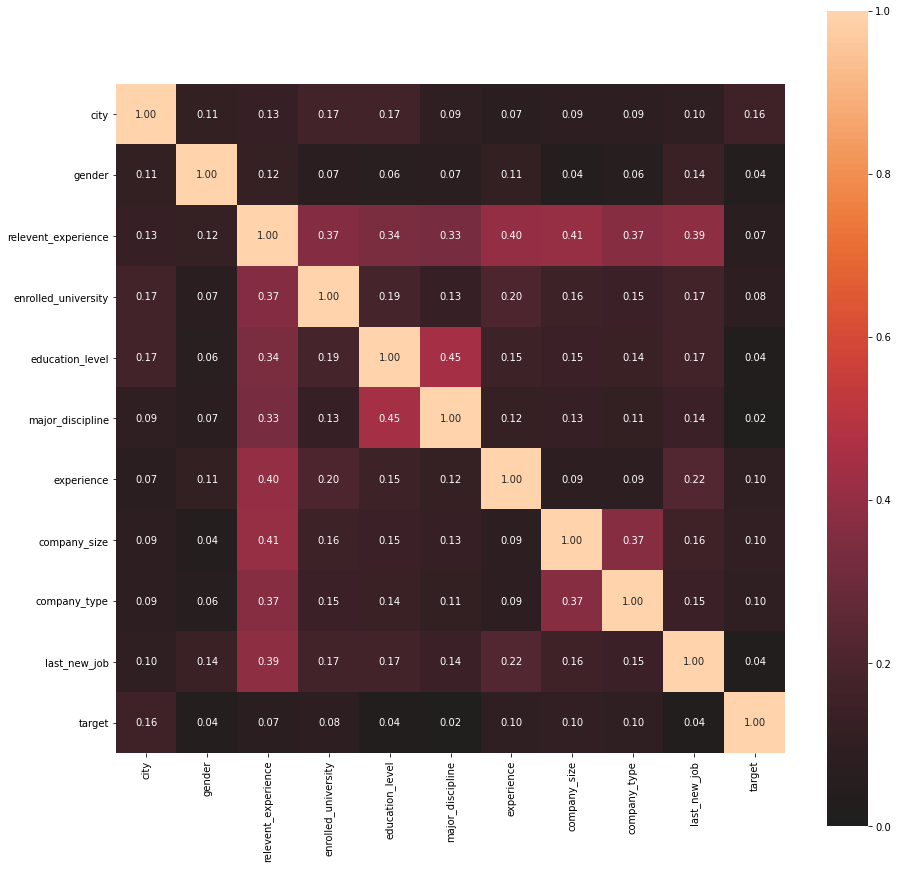

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa11d091ac8>,
 'corr':                          city    gender  ...  last_new_job    target
 city                 1.000000  0.111095  ...      0.098076  0.161292
 gender               0.111095  1.000000  ...      0.135214  0.041770
 relevent_experience  0.129723  0.122680  ...      0.390410  0.073537
 enrolled_university  0.169716  0.073732  ...      0.168509  0.083287
 education_level      0.165826  0.063267  ...      0.171119  0.036276
 major_discipline     0.094134  0.072901  ...      0.142679  0.019885
 experience           0.074361  0.113042  ...      0.223458  0.098080
 company_size         0.086121  0.043376  ...      0.163508  0.103908
 company_type         0.088280  0.060508  ...      0.145491  0.096019
 last_new_job         0.098076  0.135214  ...      1.000000  0.037407
 target               0.161292  0.041770  ...      0.037407  1.000000
 
 [11 rows x 11 columns]}

In [0]:
associations(cat_df, figsize=(15, 15))

From crammer's V test, city has good correlation with target variable (0.16), and from the test we see good correlation exist between education level and discipline quite obviously followed by relevant experience has consistent correlation with different features like experience and company size


# BASELINE MODEL

## LGBM

In [0]:
x_train,  x_val, y_train, y_val = split(new_train)

<IPython.core.display.Javascript object>

In [0]:
import lightgbm as lgb
lightgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'class_weight':'balanced'
}


In [0]:
d_train = lgb.Dataset(x_train, label=y_train)

In [0]:
model_lgbm  = lgb.LGBMClassifier(class_weight='balanced',objective='binary')

In [0]:
CAT = CATEGORICAL_COL + ORDINAL

In [0]:
lg_cv = lgb.cv(lightgbm_params, d_train,nfold=5, categorical_feature=CAT, verbose_eval=20, early_stopping_rounds=40, shuffle=False)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city', 'company_size', 'company_type', 'education_level', 'enrolled_university', 'experience', 'gender', 'last_new_job', 'major_discipline', 'relevent_experience']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[20]	cv_agg's auc: 0.652035 + 0.01664
[40]	cv_agg's auc: 0.649076 + 0.0130336


In [0]:
print('Best CV score:', np.mean(lg_cv['auc-mean']))

<IPython.core.display.Javascript object>

Best CV score: 0.6440269929839343


## CATBOOST

In [0]:
CAT_IND = x_train.columns.get_indexer(CAT)

In [0]:
x_train[CAT] = x_train[CAT].astype('int')

In [0]:
# !pip install catboost
from catboost import Pool, cv

In [0]:
params = {"iterations": 100,
          "loss_function": "Logloss",
          'custom_metric':'AUC',
          'class_weights':[1,6],
          "verbose": False}


In [0]:
cv_data = Pool(data=x_train,
                  label=y_train,
                  cat_features=CAT_IND)

In [0]:
scores = cv(cv_data,
            params,
            fold_count=5, shuffle=False)

In [0]:
scores['test-AUC-mean'].max()

0.6552740040902773

## XGBOOST and ADABOOST

In [0]:
new_train1 = pd.get_dummies(data=new_train, columns=['gender',
 'enrolled_university',
 'major_discipline',
 'company_type',
 'relevent_experience',
 'education_level',
 'company_size',
 'last_new_job'])

new_test1 = pd.get_dummies(data=new_test, columns=['gender',
 'enrolled_university',
 'major_discipline',
 'company_type',
 'relevent_experience',
 'education_level',
 'company_size',
 'last_new_job'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
x_train,  x_val, y_train, y_val = split(new_train1)

<IPython.core.display.Javascript object>

In [0]:
x_train.shape

(14687, 46)

## ADABOOST, RF and XG cv

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

adb_model = AdaBoostClassifier()
adb = cross_validate(adb_model, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)


In [0]:
np.mean(adb['test_score'])

<IPython.core.display.Javascript object>

0.6429555394280193

In [0]:
import xgboost as xgb

xgtrain = xgb.DMatrix(x_train, y_train )
model_xg=xgb.XGBClassifier(random_state=0, scale_pos_weight=6)
xgb_param = model_xg.get_xgb_params()

In [0]:
xg_cv = xgb.cv(xgb_param, xgtrain, nfold=5, metrics='auc', seed=0)

In [0]:
xg_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.634940,0.005584,0.619664,0.020765
1,0.643012,0.004374,0.629938,0.024673
2,0.648741,0.004228,0.636635,0.023637
3,0.652484,0.005428,0.639847,0.023829
4,0.655577,0.005803,0.641583,0.019232
5,0.658149,0.005143,0.644614,0.018492
6,0.660556,0.005118,0.648291,0.019816
7,0.663278,0.004258,0.649114,0.019316
8,0.664846,0.004764,0.650634,0.020331
9,0.666969,0.004652,0.652148,0.019450


In [0]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(class_weight='balanced')
rf = cross_validate(rf_model, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)


In [0]:

np.mean(rf['test_score'])

<IPython.core.display.Javascript object>

0.6172363028486421

In [0]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight={0:1,1:6})
lr_res = cross_validate(LR, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

In [0]:
np.mean(lr_res['test_score'])

<IPython.core.display.Javascript object>

0.5960405000736326

From cross validation results we have obtained good results for the cat boost and xg boost model

## BEST MODEL

In [0]:
# !pip install catboost
x_train,  x_val, y_train, y_val = split(new_train1)

from catboost import CatBoostClassifier

cat = CatBoostClassifier(class_weights=[1,6], eval_metric='AUC', silent=True)


<IPython.core.display.Javascript object>

In [0]:
CAT = CATEGORICAL_COL+ORDINAL
CAT_IND = x_train.columns.get_indexer(CAT)
# x_train[CAT]= x_train[CAT].astype('int')
# x_val[CAT] = x_val[CAT].astype('int')
cat.fit(x_train, y_train, eval_set=[(x_val,y_val)])

In [0]:
evaluate_model(y_val, cat.predict(x_val))

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3187
           1       0.23      0.50      0.31       485

    accuracy                           0.71      3672
   macro avg       0.57      0.62      0.57      3672
weighted avg       0.82      0.71      0.75      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          2382  244
1           805  241
MATHEW CORRELATION COEFF
***************************
0.18327582571673784
ROC_AUC
***************************
0.6221592875696693


In [0]:
new_test['target'] = p
new_test[['target','enrollee_id']].to_csv('su.csv', index=False)

In [0]:
xg = xgb.XGBClassifier(random_state=0, scale_pos_weight=6)
xg.fit(x_train, y_train, eval_set=[(x_val,y_val)], eval_metric='auc')

<IPython.core.display.Javascript object>

[0]	validation_0-auc:0.635599
[1]	validation_0-auc:0.64166
[2]	validation_0-auc:0.647523
[3]	validation_0-auc:0.648339
[4]	validation_0-auc:0.651961
[5]	validation_0-auc:0.651683
[6]	validation_0-auc:0.651454
[7]	validation_0-auc:0.654296
[8]	validation_0-auc:0.652618
[9]	validation_0-auc:0.652919
[10]	validation_0-auc:0.653668
[11]	validation_0-auc:0.654258
[12]	validation_0-auc:0.654714
[13]	validation_0-auc:0.655968
[14]	validation_0-auc:0.657676
[15]	validation_0-auc:0.658484
[16]	validation_0-auc:0.659021
[17]	validation_0-auc:0.65927
[18]	validation_0-auc:0.660017
[19]	validation_0-auc:0.66106
[20]	validation_0-auc:0.661587
[21]	validation_0-auc:0.661899
[22]	validation_0-auc:0.662781
[23]	validation_0-auc:0.664037
[24]	validation_0-auc:0.664236
[25]	validation_0-auc:0.664174
[26]	validation_0-auc:0.663765
[27]	validation_0-auc:0.663874
[28]	validation_0-auc:0.663784
[29]	validation_0-auc:0.664382
[30]	validation_0-auc:0.664403
[31]	validation_0-auc:0.664511
[32]	validation_0-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
evaluate_model(y_val, xg.predict(x_val))

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      3187
           1       0.23      0.51      0.31       485

    accuracy                           0.71      3672
   macro avg       0.57      0.62      0.56      3672
weighted avg       0.82      0.71      0.75      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          2343  238
1           844  247
MATHEW CORRELATION COEFF
***************************
0.18111315604038639
ROC_AUC
***************************
0.6222262477396899


In [0]:
feat = pd.DataFrame({'importance':xg.feature_importances_, 'features':x_train.columns}).sort_values(by='importance', ascending=False)

<IPython.core.display.Javascript object>

In [0]:
pd.set_option('display.max_rows',100)
feat.head(20)

<IPython.core.display.Javascript object>

,importance,features
22,0.098242,company_type_4.0
1,0.090084,city_development_index
11,0.070684,enrolled_university_4.0
28,0.046161,education_level_2.0
26,0.038637,education_level_0.0
24,0.034763,relevent_experience_0.0
40,0.025948,last_new_job_1.0
2,0.025444,experience
20,0.024363,company_type_2.0
44,0.023573,last_new_job_5.0


In [0]:
# !pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (0.5, 1.0),  # Change for big datasets
    'colsample': (0.5, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc'))
xg_optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1)


In [0]:
xg_optimizer.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

|  1        |  0.659    |  0.7085   |  3.602    |  0.01011  |  5.116    |  232.1    |  0.5462   |


<IPython.core.display.Javascript object>

|  2        |  0.6194   |  0.5931   |  1.728    |  0.4028   |  6.772    |  477.3    |  0.8426   |


<IPython.core.display.Javascript object>

|  3        |  0.6625   |  0.6022   |  4.391    |  0.03711  |  7.693    |  475.6    |  0.7793   |


<IPython.core.display.Javascript object>

|  4        |  0.5827   |  0.5702   |  0.9905   |  0.8027   |  9.778    |  382.1    |  0.8462   |


<IPython.core.display.Javascript object>

|  5        |  0.6596   |  0.9382   |  4.473    |  0.09419  |  3.273    |  252.8    |  0.9391   |


<IPython.core.display.Javascript object>

|  6        |  0.6609   |  1.0      |  5.0      |  0.01     |  10.0     |  1e+03    |  0.5      |


<IPython.core.display.Javascript object>

|  7        |  0.6609   |  1.0      |  5.0      |  0.01     |  10.0     |  766.0    |  0.5      |


<IPython.core.display.Javascript object>

|  8        |  0.6614   |  0.9675   |  2.189    |  0.09871  |  3.248    |  100.1    |  0.7445   |


<IPython.core.display.Javascript object>

|  9        |  0.6587   |  0.5      |  5.0      |  0.01     |  3.0      |  883.8    |  0.5      |


<IPython.core.display.Javascript object>

|  10       |  0.6609   |  0.5      |  5.0      |  0.01     |  10.0     |  627.2    |  0.5      |


<IPython.core.display.Javascript object>

|  11       |  0.6614   |  1.0      |  5.0      |  0.01     |  10.0     |  554.8    |  0.5      |


<IPython.core.display.Javascript object>

|  12       |  0.6338   |  0.7013   |  4.978    |  0.3825   |  9.924    |  938.7    |  0.8359   |


<IPython.core.display.Javascript object>

|  13       |  0.6371   |  0.698    |  4.961    |  0.3674   |  9.81     |  157.2    |  0.9485   |


<IPython.core.display.Javascript object>

|  14       |  0.6591   |  0.6711   |  4.878    |  0.2845   |  3.089    |  692.2    |  0.7102   |


<IPython.core.display.Javascript object>

|  15       |  0.6201   |  0.7425   |  4.806    |  0.6106   |  9.87     |  833.2    |  0.7153   |


<IPython.core.display.Javascript object>

|  16       |  0.5906   |  0.7813   |  0.1355   |  0.5946   |  3.088    |  991.2    |  0.6139   |


<IPython.core.display.Javascript object>

|  17       |  0.639    |  0.9581   |  4.894    |  0.4106   |  9.653    |  284.9    |  0.6491   |


<IPython.core.display.Javascript object>

|  18       |  0.6411   |  0.7802   |  4.803    |  0.3403   |  9.907    |  711.8    |  0.7774   |


<IPython.core.display.Javascript object>

|  19       |  0.6606   |  0.7322   |  4.983    |  0.2141   |  3.438    |  434.4    |  0.998    |


<IPython.core.display.Javascript object>

|  20       |  0.6429   |  0.6348   |  4.857    |  0.8914   |  3.465    |  588.1    |  0.7109   |


<IPython.core.display.Javascript object>

|  21       |  0.607    |  0.9153   |  4.535    |  0.6477   |  9.851    |  101.9    |  0.5663   |


<IPython.core.display.Javascript object>

|  22       |  0.6458   |  0.9655   |  4.467    |  0.9294   |  3.485    |  189.4    |  0.9312   |


<IPython.core.display.Javascript object>

|  23       |  0.6587   |  0.8187   |  0.002136 |  0.1073   |  3.034    |  143.2    |  0.8785   |


<IPython.core.display.Javascript object>

|  24       |  0.5929   |  0.6773   |  4.524    |  0.8593   |  9.764    |  431.5    |  0.9463   |


<IPython.core.display.Javascript object>

|  25       |  0.6547   |  0.7123   |  4.965    |  0.5721   |  3.026    |  336.0    |  0.7211   |


In [0]:
for i,n in xg_optimizer.max["params"].items():
    print(i,int(round(n)))

colsample 1
gamma 4
learning_rate 0
max_depth 8
n_estimators 476
subsample 1


# SEQUENTIAL NEURAL NETWORK

In [0]:
x_train, x_val, y_train, y_val = split(new_train1)

<IPython.core.display.Javascript object>

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, BatchNormalization

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3968      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
from keras import optimizers
import keras

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=2e-3),
              metrics=[keras.metrics.AUC(name='auc')])

from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint('nn_weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
es=EarlyStopping(monitor='val_loss', patience=100)

In [0]:

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=300,callbacks=[es,checkpoint],
                    verbose=1,
                    validation_data=(x_val,y_val), class_weight={0:1, 1:6})

Train on 14687 samples, validate on 3672 samples
Epoch 1/300
14687/14687 [==============================] - 2s 115us/step - loss: 1.0989 - auc: 0.6396 - val_loss: 0.6805 - val_auc: 0.6345

Epoch 00001: val_loss improved from inf to 0.68048, saving model to nn_weights.hdf5
Epoch 2/300
14687/14687 [==============================] - 1s 85us/step - loss: 1.0982 - auc: 0.6416 - val_loss: 0.6486 - val_auc: 0.6290

Epoch 00002: val_loss improved from 0.68048 to 0.64864, saving model to nn_weights.hdf5
Epoch 3/300
14687/14687 [==============================] - 1s 85us/step - loss: 1.0976 - auc: 0.6416 - val_loss: 0.6421 - val_auc: 0.6425

Epoch 00003: val_loss improved from 0.64864 to 0.64213, saving model to nn_weights.hdf5
Epoch 4/300
14687/14687 [==============================] - 1s 83us/step - loss: 1.0996 - auc: 0.6385 - val_loss: 0.6176 - val_auc: 0.6347

Epoch 00004: val_loss improved from 0.64213 to 0.61758, saving model to nn_weights.hdf5
Epoch 5/300
14687/14687 [=====================

In [0]:
y_pred = model.predict(x_val)

In [0]:
nn_pred = np.where(y_pred<=0.5,0,1)

<IPython.core.display.Javascript object>

In [0]:
evaluate_model(y_val, nn_pred)

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3187
           1       0.22      0.39      0.28       485

    accuracy                           0.73      3672
   macro avg       0.56      0.59      0.56      3672
weighted avg       0.80      0.73      0.76      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          2505  297
1           682  188
MATHEW CORRELATION COEFF
***************************
0.13826245528162823
ROC_AUC
***************************
0.5868172569620786


In [0]:
from pycaret.classification import *


# FEATURE ENGINEERING

In [0]:
def split(df):
  x_train, x_val, y_train, y_val = train_test_split(df.drop(['target','enrollee_id'], axis=1), \
                                                  df['target'].astype('int'),
                                                    test_size=0.20,shuffle=True,
                                                    random_state=0,
                                                    stratify=df['target'])
  return x_train, x_val, y_train, y_val

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import roc_auc_score

def evaluate_model(y_true, y_pred):
  print('CLASSIFICATION REPORT')
  print('***************************')
  print(classification_report(y_true,y_pred))
  print('CONFUSION MATRIX')
  print('****************************')
  cm = confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(cm.T, index=[0,1], columns=[0,1])
  cm_df.index.name = 'Predicted'
  cm_df.columns.name = 'True'
  print(cm_df)
  print('MATHEW CORRELATION COEFF')
  print('***************************')
  print( mcc(y_true, y_pred))
  print('ROC_AUC')
  print('***************************')
  print(roc_auc_score(y_true,y_pred))

  


In [0]:
x_train, x_val, y_train, y_val = split(new_train)

<IPython.core.display.Javascript object>

In [0]:
x_train1 = pd.concat([x_train, y_train], axis=1)

<IPython.core.display.Javascript object>

probability for categorical value in training set

In [0]:

city_dict = x_train1.groupby(['city']).agg({'target':'mean'}).to_dict()['target']
# las_dict = x_train1.groupby(['last_new_job']).agg({'target':'mean'}).to_dict()['target']
edu = x_train1.groupby(['education_level']).agg({'target':'mean'}).to_dict()['target']
exp = x_train1.groupby(['experience']).agg({'target':'mean'}).to_dict()['target']
# comp = x_train1.groupby(['company_type']).agg({'target':'mean'}).to_dict()['target']


In [0]:
def prob_feat(df):
  df['city_prob'] = df['city'].replace(city_dict)
  # df['company_typ_prob'] = df['company_type'].replace(comp)
  df['exp_prob'] = df['experience'].replace(exp)
  df['edu_prob'] = df['education_level'].replace(edu)
  # df['last_new_prob'] = df['last_new_job'].replace(las_dict)
  return df

In [0]:
new_train = prob_feat(new_train)
new_test = prob_feat(new_test)

In [0]:
new_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,comp_size_mean,target,city_prob,exp_prob,edu_prob
0,23798.0,42.0,0.689,1.0,0.0,4.0,2.0,5.0,3.0,3.0,5.0,1.0,106.0,300.0,0,0.120482,0.170893,0.144264
1,29166.0,113.0,0.923,1.0,0.0,4.0,2.0,5.0,14.0,0.0,1.0,1.0,69.0,5.0,0,0.114286,0.133612,0.144264
2,46.0,49.0,0.910,1.0,0.0,4.0,2.0,5.0,6.0,2.0,4.0,2.0,4.0,75.0,0,0.086924,0.135428,0.144264
3,18527.0,94.0,0.666,1.0,0.0,4.0,2.0,5.0,14.0,2.0,5.0,1.0,26.0,75.0,0,0.082353,0.133612,0.144264
4,21751.0,3.0,0.887,1.0,1.0,4.0,3.0,5.0,8.0,4.0,5.0,2.0,88.0,3033.0,1,0.153846,0.103333,0.117748


In [0]:
new_train['is_train']=1
new_test['is_train']=0

In [0]:
df = pd.concat([new_train, new_test], axis=0)

<IPython.core.display.Javascript object>

In [0]:
# no. of hourse spent on training for each company
df['avg_comp_training'] = df.groupby(['company_size', 'company_type'])['training_hours'].transform('mean')

# ratio individual person on company avg training hours
df['ratio_training'] = df['training_hours']/df['avg_comp_training']

In [0]:
city = df.groupby(['city','city_development_index']).agg({'gender':'count'}).reset_index().sort_values(by=['city_development_index'], ascending=False)

In [0]:
city['rank'] = [x for x in range(1,city.shape[0]+1)]

In [0]:
df = df.merge(city[['city','rank']], on=['city'])

In [0]:
df['agg_rank'] = df.groupby(['company_type','company_size'])['rank'].transform('sum')

In [0]:
 # no of branches for each company
df['branches'] = df.groupby(['company_type','company_size'])['city'].transform('count')

In [0]:
# number of people
df['countofpeople'] = df.groupby(['company_size', 'company_type'])['gender'].transform('count')

In [0]:
# ratio of available count on mean
df['ratio_count'] = df['countofpeople'] / df['comp_size_mean']

In [0]:
# average experience of employee wrt job seq
df['avg_experience_job'] = df.groupby(['last_new_job','company_size', 'company_type'])['experience'].transform('mean')

In [0]:
# ratio of experience on the companies avg experience for each job sequence
df['ratio_on_avg_exp'] = df['experience'] / df['avg_experience_job']

In [0]:
# education level gender experience in each company
df['avg_gender_exp'] = df.groupby(['gender','education_level','company_size', 'company_type'])['experience'].transform('mean')

In [0]:
# ratio of experience on the companies avg experience for each gender
df['ratio_on_gender_exp'] = df['experience'] / df['avg_gender_exp']

In [0]:
# training hours spent on each city wrt comp
df['avg_ct_training'] = df.groupby(['city','company_size', 'company_type'])['training_hours'].transform('mean')

In [0]:
# ratio of training hours on the companies avg training for each city
df['ratio_on_ct_training'] = df['training_hours'] / df['avg_ct_training']

In [0]:
# training hours for each level with in org
df['avg_edu_training'] = df.groupby(['education_level','company_size', 'company_type'])['training_hours'].transform('mean')


In [0]:
# ratio of training hours spent on avg training hours spent for each edu level
df['ratio_edu_training'] = df['training_hours'] / df['avg_edu_training']

In [0]:
df['avg_re_edu_exp'] = df.groupby(['relevent_experience','education_level','company_size', 'company_type'])['experience'].transform('mean')

In [0]:
df['avg_ct_edu_exp'] = df.groupby(['city','education_level','company_size', 'company_type'])['experience'].transform('mean')

In [0]:
df['avg_gender_ct_edu_exp'] = df.groupby(['gender','city','education_level','company_size', 'company_type'])['experience'].transform('mean')

In [0]:
df['avg_gender_training'] = df.groupby(['gender','company_size', 'company_type'])['training_hours'].transform('mean')

In [0]:
new_train1 = df[df['is_train']==1].drop(['is_train'], axis=1)
new_test1 = df[df['is_train']==0].drop(['is_train'], axis=1)

In [0]:
new_train2 = pd.get_dummies(data=new_train1, columns=['gender',
 'enrolled_university',
 'major_discipline',
 'company_type',
 'relevent_experience',
 'education_level',
 'company_size',
 'last_new_job'])

new_test2 = pd.get_dummies(data=new_test1, columns=['gender',
 'enrolled_university',
 'major_discipline',
 'company_type',
 'relevent_experience',
 'education_level',
 'company_size',
 'last_new_job'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
x_train, x_val, y_train, y_val = split(new_train2)

<IPython.core.display.Javascript object>

In [0]:
xg = xgb.XGBClassifier(random_state=0, scale_pos_weight=6)
xg.fit(x_train, y_train, eval_set=[(x_val,y_val)], eval_metric='auc')

<IPython.core.display.Javascript object>

[0]	validation_0-auc:0.620207
[1]	validation_0-auc:0.629101
[2]	validation_0-auc:0.631248
[3]	validation_0-auc:0.63992
[4]	validation_0-auc:0.63897
[5]	validation_0-auc:0.64143
[6]	validation_0-auc:0.643469
[7]	validation_0-auc:0.645693
[8]	validation_0-auc:0.64688
[9]	validation_0-auc:0.647982
[10]	validation_0-auc:0.649258
[11]	validation_0-auc:0.649774
[12]	validation_0-auc:0.649606
[13]	validation_0-auc:0.650114
[14]	validation_0-auc:0.651014
[15]	validation_0-auc:0.651397
[16]	validation_0-auc:0.650701
[17]	validation_0-auc:0.651252
[18]	validation_0-auc:0.650698
[19]	validation_0-auc:0.651024
[20]	validation_0-auc:0.650081
[21]	validation_0-auc:0.649691
[22]	validation_0-auc:0.649967
[23]	validation_0-auc:0.650386
[24]	validation_0-auc:0.649996
[25]	validation_0-auc:0.650927
[26]	validation_0-auc:0.650885
[27]	validation_0-auc:0.651587
[28]	validation_0-auc:0.651708
[29]	validation_0-auc:0.651882
[30]	validation_0-auc:0.651964
[31]	validation_0-auc:0.654008
[32]	validation_0-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
evaluate_model(y_val, xg.predict(x_val))

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3187
           1       0.22      0.49      0.30       485

    accuracy                           0.70      3672
   macro avg       0.56      0.61      0.56      3672
weighted avg       0.81      0.70      0.74      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          2338  247
1           849  238
MATHEW CORRELATION COEFF
***************************
0.16637890072400727
ROC_AUC
***************************
0.61216346044983


In [0]:
feat = pd.DataFrame({'feature':x_train.columns,'importance':xg.feature_importances_}).sort_values(by=['importance'], ascending=False)

<IPython.core.display.Javascript object>

In [0]:
feat

,feature,importance
5,city_prob,0.107930
45,company_type_4.0,0.082956
47,relevent_experience_0.0,0.064500
4,comp_size_mean,0.057489
34,enrolled_university_4.0,0.042970
63,last_new_job_1.0,0.031396
24,avg_ct_edu_exp,0.030252
7,edu_prob,0.029240
12,branches,0.026258
16,ratio_on_avg_exp,0.026067


In [0]:
y_pred = rf.predict(x_val)

In [0]:
evaluate_model(y_val, y_pred)

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3187
           1       0.32      0.03      0.05       485

    accuracy                           0.86      3672
   macro avg       0.59      0.51      0.49      3672
weighted avg       0.80      0.86      0.81      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          3157  471
1            30   14
MATHEW CORRELATION COEFF
***************************
0.060531671021620485
ROC_AUC
***************************
0.5097263690443458


In [0]:
x_train, x_val, y_train, y_val = split(new_train1)

<IPython.core.display.Javascript object>

In [0]:
import lightgbm as lgb

model_lgbm  = lgb.LGBMClassifier(class_weight='balanced',objective='binary')

In [0]:
CAT = CATEGORICAL_COL+ORDINAL

In [0]:
model_lgbm.fit(x_train, y_train, eval_set=(x_val,y_val), eval_metric='auc')

[1]	valid_0's auc: 0.628668	valid_0's binary_logloss: 0.683759
[2]	valid_0's auc: 0.632946	valid_0's binary_logloss: 0.675783
[3]	valid_0's auc: 0.638379	valid_0's binary_logloss: 0.668985
[4]	valid_0's auc: 0.638958	valid_0's binary_logloss: 0.663646
[5]	valid_0's auc: 0.645767	valid_0's binary_logloss: 0.658142
[6]	valid_0's auc: 0.644171	valid_0's binary_logloss: 0.653539
[7]	valid_0's auc: 0.642648	valid_0's binary_logloss: 0.650306
[8]	valid_0's auc: 0.646148	valid_0's binary_logloss: 0.64628
[9]	valid_0's auc: 0.645468	valid_0's binary_logloss: 0.643405
[10]	valid_0's auc: 0.644962	valid_0's binary_logloss: 0.640608
[11]	valid_0's auc: 0.645294	valid_0's binary_logloss: 0.638826
[12]	valid_0's auc: 0.645787	valid_0's binary_logloss: 0.636752
[13]	valid_0's auc: 0.646028	valid_0's binary_logloss: 0.635137
[14]	valid_0's auc: 0.645441	valid_0's binary_logloss: 0.634269
[15]	valid_0's auc: 0.645603	valid_0's binary_logloss: 0.632462
[16]	valid_0's auc: 0.644498	valid_0's binary_logl

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
evaluate_model(y_val, model_lgbm.predict(x_val))

CLASSIFICATION REPORT
***************************
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3187
           1       0.22      0.46      0.30       485

    accuracy                           0.72      3672
   macro avg       0.56      0.61      0.56      3672
weighted avg       0.81      0.72      0.75      3672

CONFUSION MATRIX
****************************


<IPython.core.display.Javascript object>

True          0    1
Predicted           
0          2418  264
1           769  221
MATHEW CORRELATION COEFF
***************************
0.16356629549090668
ROC_AUC
***************************
0.6071886756442894


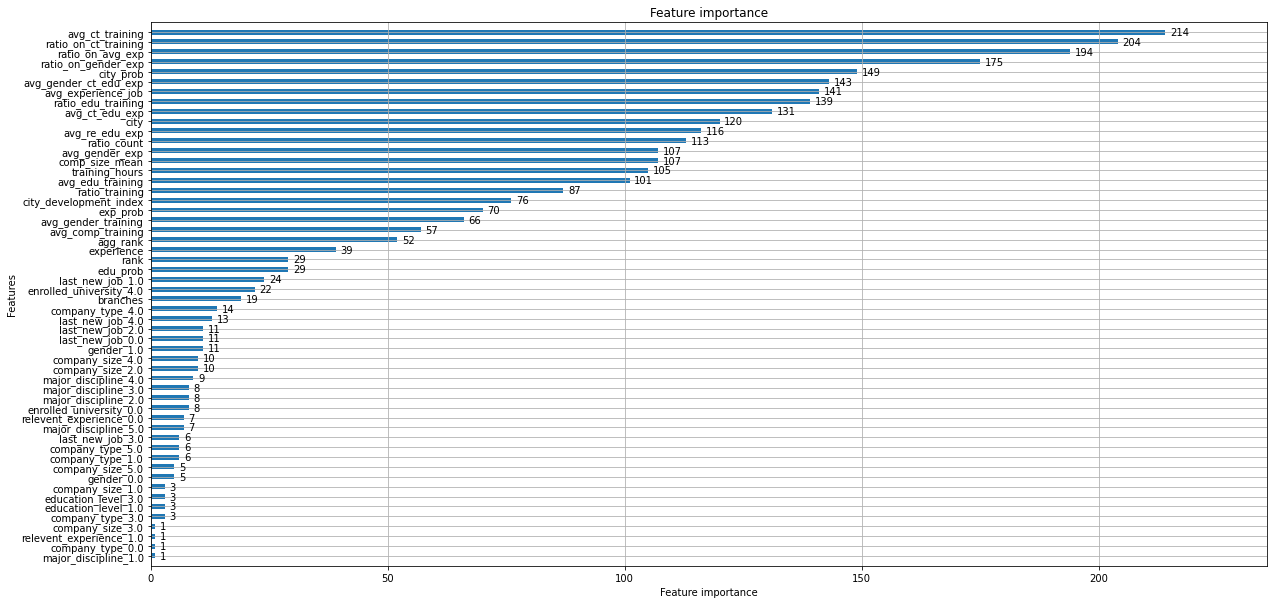

In [0]:
lgb.plot_importance(model_lgbm, height=0.5,ignore_zero=True, figsize=(20,10))

In [0]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)